<a href="https://colab.research.google.com/github/Mohamed-Tarek-helmy/Machine-Learning-Algorithms-/blob/main/House_Pricing_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas_profiling as pp

In [ ]:
df=pd.read_csv("data.csv")

In [ ]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
df.isna().sum()


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
df.mode()

<bound method NDFrame._add_numeric_operations.<locals>.sum of                   date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-06-23 00:00:00    0.0       3.0        2.5         1720    5000.0   
1                  NaN    NaN       NaN        NaN         1940       NaN   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.0         0.0   0.0        3.0        1010            0.0    2006.0   
1     NaN         NaN   NaN        NaN        1200            NaN       NaN   

   yr_renovated                 street     city  statezip country  
0           0.0  2520 Mulberry Walk NE  Seattle  WA 98103     USA  
1           NaN                    NaN      NaN       NaN     NaN  >

In [ ]:
df[df==0].count()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

### if the nulls is in the dependent variable we would delete them

In [ ]:
df= df[df['price'] !=0] # boolean indexing 

In [ ]:
df['bedrooms'] !=0

0       True
1       True
2       True
3       True
4       True
        ... 
4595    True
4596    True
4597    True
4598    True
4599    True
Name: bedrooms, Length: 4551, dtype: bool

In [ ]:
df= df[df['bedrooms'] !=0] # boolean indexing 
df= df[df['bathrooms'] !=0] # boolean indexing 


In [ ]:
df[df==0].count()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       4519
view             4102
condition           0
sqft_above          0
sqft_basement    2716
yr_built            0
yr_renovated     2706
street              0
city                0
statezip            0
country             0
dtype: int64

In [ ]:
df['view'].value_counts()

0    4102
2     200
3     115
1      69
4      63
Name: view, dtype: int64

In [ ]:
## base line model 

x = df.drop(['date','street','city','statezip','country','price'],axis=1 )
y = df ['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (x,y,test_size =0.3 , random_state=0)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

model.score(X_train,y_train)


0.19352231158790256

In [ ]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
4452,3.0,1.00,1040,6860,2.0,0,0,3,1040,0,1942,1999
2457,5.0,2.75,3320,23760,2.0,0,0,4,2190,1130,1975,0
1390,3.0,2.25,2370,217800,2.0,0,0,3,2370,0,1979,2014
3402,4.0,1.75,2085,174240,1.0,0,0,3,1610,475,1964,2000
3197,4.0,2.50,2450,55387,2.0,0,0,3,2450,0,1994,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1033,3.0,1.50,1270,1443,3.0,0,0,3,1270,0,2007,0
3264,2.0,1.00,970,5500,1.0,0,0,3,970,0,1956,2001
1653,5.0,2.75,2080,13189,2.0,0,0,3,2080,0,1987,2000
2607,4.0,2.50,3070,34412,1.0,0,3,4,2070,1000,1950,1983


In [ ]:
df.median()

<ipython-input-74-6d467abf240d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


price            465000.00
bedrooms              3.00
bathrooms             2.25
sqft_living        1970.00
sqft_lot           7680.00
floors                1.50
waterfront            0.00
view                  0.00
condition             3.00
sqft_above         1590.00
sqft_basement         0.00
yr_built           1976.00
yr_renovated          0.00
dtype: float64

In [ ]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
df['price'].unique()

array([ 313000.      , 2384000.      ,  342000.      , ...,
        416904.166667,  203400.      ,  220600.      ])

In [ ]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.342348,0.519517,0.676139,0.083798,0.276820,0.112390,0.350153,0.057846,0.578633,0.289502,0.031954,-0.049886
bedrooms,0.342348,1.000000,0.537835,0.604469,0.064484,0.173745,-0.020586,0.098039,0.019208,0.482623,0.322620,0.146642,-0.059661
bathrooms,0.519517,0.537835,1.000000,0.748928,0.097468,0.497854,0.031865,0.174951,-0.127857,0.677771,0.252864,0.481277,-0.224061
sqft_living,0.676139,0.604469,0.748928,1.000000,0.202752,0.345961,0.044037,0.271077,-0.065500,0.867935,0.405818,0.304766,-0.131364
sqft_lot,0.083798,0.064484,0.097468,0.202752,1.000000,-0.000685,0.018260,0.065106,0.002864,0.210230,0.019247,0.048150,-0.020726
floors,0.276820,0.173745,0.497854,0.345961,-0.000685,1.000000,0.013239,0.018114,-0.277313,0.527108,-0.277011,0.470122,-0.235920
waterfront,0.112390,-0.020586,0.031865,0.044037,0.018260,0.013239,1.000000,0.321865,0.016984,0.026799,0.038890,-0.033712,0.017019
view,0.350153,0.098039,0.174951,0.271077,0.065106,0.018114,0.321865,1.000000,0.063251,0.137911,0.289176,-0.069041,0.029464
condition,0.057846,0.019208,-0.127857,-0.065500,0.002864,-0.277313,0.016984,0.063251,1.000000,-0.183854,0.207122,-0.400670,-0.182602
sqft_above,0.578633,0.482623,0.677771,0.867935,0.210230,0.527108,0.026799,0.137911,-0.183854,1.000000,-0.101717,0.424583,-0.168693


In [ ]:

plt.figure(figsize = (10,16))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
plt.figure(figsize = (18,16))
sns.histplot(data=df,x= 'price')
plt.show()

In [ ]:
sns.boxplot(data=df,x= 'price')
plt.show()

In [ ]:
from scipy import stats
##df= df.loc[[np.abs(stats.zscore(df['price']))<3, 'price']]
df = df[(stats.zscore(df['price']) < 3) & (stats.zscore(df['price']) > -3)]
#df=df[(stats.zscore(df['price'])<3)&(stats.zscore(df['price'])>3)]

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df,x='sqft_living',y='price')
plt.show()

In [ ]:
df['basement']=np.where(df.sqft_basement==0,0,1) # feature enginerring for basemnt deaature 

In [ ]:
df['basement']

0       0
1       1
2       0
3       1
4       1
       ..
4595    0
4596    0
4597    0
4598    1
4599    0
Name: basement, Length: 4549, dtype: int64

In [ ]:
df.groupby ('bedrooms').price.agg([len,min,max])

,len,min,max
bedrooms,,,
1.0,37,80000.0,540000.0
2.0,561,7800.0,1695000.0
3.0,2025,83300.0,26590000.0
4.0,1512,84350.0,4489000.0
5.0,338,185000.0,7062500.0
6.0,59,175000.0,3100000.0
7.0,14,280000.0,3200000.0
8.0,2,340000.0,1970000.0
9.0,1,599999.0,599999.0


In [ ]:
df['bedrooms']=np.where(df.bedrooms>6,1,'bedrooms')

In [ ]:
df['bedrooms']

0       bedrooms
1       bedrooms
2       bedrooms
3       bedrooms
4       bedrooms
          ...   
4595    bedrooms
4596    bedrooms
4597    bedrooms
4598    bedrooms
4599    bedrooms
Name: bedrooms, Length: 4549, dtype: object

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot('bedrooms',data=df)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [ ]:
df.groupby ('bathrooms').price.agg([len,min,max])

,len,min,max
bathrooms,,,
0.75,17,80000.0,562100.0
1.00,736,7800.0,2110000.0
1.25,3,321950.0,545000.0
1.50,287,107500.0,2199900.0
1.75,628,120750.0,2100000.0
2.00,425,83300.0,26590000.0
2.25,413,132250.0,2400000.0
2.50,1184,168000.0,12899000.0
2.75,270,188000.0,2180000.0


In [ ]:
x = df.drop(['date','street','city','statezip','country','price','sqft_lot','yr_built','yr_renovated'],axis=1 )
y = df ['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (x,y,test_size =0.3 , random_state=0)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

model.score(X_train,y_train)*100

ValueError: ignored

In [ ]:
df['bathrooms']=np.where(df.bathrooms>4,4,bathrooms)
df['bathrooms']=np.where(df.bathrooms==1.25,1,bathrooms)

NameError: ignored

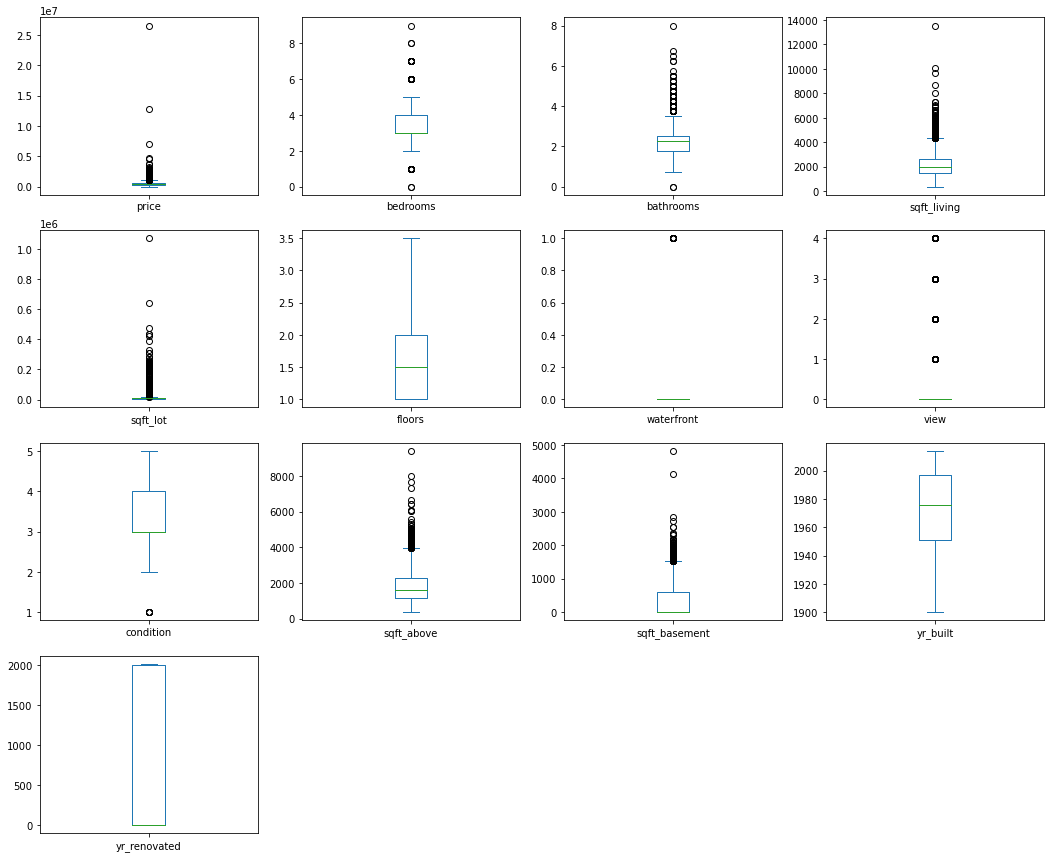

In [ ]:
df.plot(kind = "box" , subplots = True , figsize = (18,15) , layout = (4,4))
plt.show()

In [ ]:
df['country'].nunique()

1

In [ ]:
df['street'].nunique()

4474

In [ ]:
df['city'].nunique()

44

In [ ]:
df = df.drop(['date','city','price','sqft_lot','yr_built','yr_renovated','city','street','country'],axis=1,inplace=True )

In [ ]:
df['statezip'].nunique()

KeyError: ignored

In [ ]:
df=pd.get_dummies(df,columns=['statezip'],prefix = ['statezip'])

In [ ]:
df

In [ ]:
df['sqft_living']=np.where(df.sqft_living>6000,6000,df.sqft_living) #clipping

AttributeError: ignored

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df,x='sqft_living',y='price')

In [ ]:
profile = df.profile_report(title='Pandas Profiling Report')


# forming dataframe and printing
data = pd.DataFrame(dct)
print(data)
  
# forming ProfileReport and save
# as output.html file
profile = pp.ProfileReport(data)
profile.to_file("output.html")

AttributeError: ignored

In [ ]:
profile

NameError: ignored

In [ ]:
profile.to_file("output.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]